In [1]:
# Machine Learning Model for 'Geld ausgegeben' prediction over other parameters of Einkaufsstatistik

# Importing the libraries

# Load numpy
import numpy as np

# Load pandas
import pandas as pd

# Plotting library
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn library
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error 
from sklearn.preprocessing import StandardScaler

# render plots in jupyter notebook
%matplotlib inline

In [2]:
# Importing the dependencies
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

Using TensorFlow backend.


In [3]:
# Importing the dataset
dataset = pd.read_csv('Preprocessed_data.csv')

In [4]:
# Modelling

# X and y arrays
X = dataset[['Geschlecht', 'Berufskategorie', 'Produkt_Kategorie_1', 'Produkt_Kategorie_2', 'Produkt_Kategorie_3', '0-17', '51-55', 'A', 'B']]
y = dataset['Geld_ausgegeben']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
# Creating and Training the Model

# Initialising the DNN
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1280      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 166,145
Trainable params: 166,145
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Define a checkpoint callback
checkpoint_name = 'Weights_Deep_Neural_Network_Selected_Features-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [7]:
# Train the model
NN_model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split = 0.2, callbacks=callbacks_list)

Train on 320000 samples, validate on 80000 samples
Epoch 1/50
320000/320000 [==============================] - 198s 618us/step - loss: 2942.5650 - mean_absolute_error: 2942.5627 - val_loss: 2531.0897 - val_mean_absolute_error: 2531.0891

Epoch 00001: val_loss improved from inf to 2531.08974, saving model to Weights_Deep_Neural_Network_Selected_Features-001--2531.08974.hdf5
Epoch 2/50
320000/320000 [==============================] - 213s 666us/step - loss: 2460.1712 - mean_absolute_error: 2460.1665 - val_loss: 2365.3769 - val_mean_absolute_error: 2365.3733

Epoch 00002: val_loss improved from 2531.08974 to 2365.37689, saving model to Weights_Deep_Neural_Network_Selected_Features-002--2365.37689.hdf5
Epoch 3/50
320000/320000 [==============================] - 212s 663us/step - loss: 2369.6698 - mean_absolute_error: 2369.6633 - val_loss: 2318.1533 - val_mean_absolute_error: 2318.1477

Epoch 00003: val_loss improved from 2365.37689 to 2318.15334, saving model to Weights_Deep_Neural_Network

320000/320000 [==============================] - 154s 481us/step - loss: 2189.2451 - mean_absolute_error: 2189.2424 - val_loss: 2188.3564 - val_mean_absolute_error: 2188.3562

Epoch 00031: val_loss did not improve from 2181.15036
Epoch 32/50
320000/320000 [==============================] - 152s 474us/step - loss: 2189.4668 - mean_absolute_error: 2189.4607 - val_loss: 2183.3607 - val_mean_absolute_error: 2183.3611

Epoch 00032: val_loss did not improve from 2181.15036
Epoch 33/50
320000/320000 [==============================] - 153s 478us/step - loss: 2187.7780 - mean_absolute_error: 2187.7720 - val_loss: 2181.8229 - val_mean_absolute_error: 2181.8184

Epoch 00035: val_loss did not improve from 2181.15036
Epoch 36/50
320000/320000 [==============================] - 151s 473us/step - loss: 2186.9270 - mean_absolute_error: 2186.9280 - val_loss: 2184.2613 - val_mean_absolute_error: 2184.2649

Epoch 00037: val_loss did not improve from 2181.15036
Epoch 38/50
320000/320000 [=================

In [9]:
# Load weights file of the best model :
# weights_file = 'Weights_Deep_Neural_Network_Selected_Features-48--18738.19831.hdf5' # choose the best checkpoint 
# NN_model.load_weights(weights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

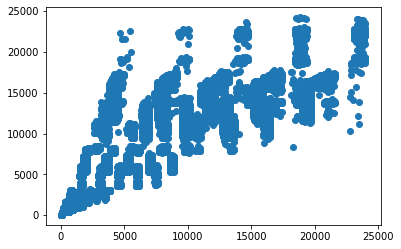

In [21]:
# Predictions from our Model
predictions = NN_model.predict(X_test)
plt.scatter(y_test,predictions)

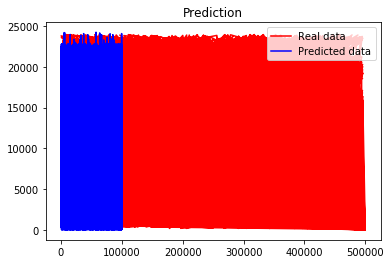

In [22]:
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(predictions, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [23]:
# sns.distplot((y_test-predictions),bins=50);

In [24]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2_Score:', metrics.r2_score(y_test, predictions))

MAE: 2206.315892527847
MSE: 9816791.235100085
RMSE: 3133.175902355322
R2_Score: 0.6132992019479494
